# Análise Univariada

- A faixa etária do cliente tem uma forte associação com o churn
- Um cliente com menos de 6 meses de contrato é mais propenso o churn
- Cliente com um contrato mensal é mais propenso ao churn

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Carregando e unificando os dataframes
df_clientes = pd.read_csv('../../docs/datasets_aula/churn_customers.csv')
df_contratos = pd.read_csv('../../docs/datasets_aula/churn_contracts.csv')
df_servicos = pd.read_csv('../../docs/datasets_aula/churn_services.csv')

df_churn = pd.merge(df_clientes, df_contratos, on='customerID', how='left')
df_churn = pd.merge(df_churn, df_servicos, on='customerID', how='left')

# Visualizando as primeiras linhas do dataframe
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,Churn,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,Month-to-month,Yes,Electronic check,29.85,...,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,One year,No,Mailed check,56.95,...,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Month-to-month,Yes,Mailed check,53.85,...,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,One year,No,Bank transfer (automatic),42.30,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Month-to-month,Yes,Electronic check,70.70,...,Yes,Yes,No,Fiber optic,No,No,No,No,No,No


In [3]:
# Visualizando as informações do dataframe
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
 12  PhoneService      7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [4]:
# Visualizando as colunas do dataframe
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [5]:
# Visualizando as dimensões do dataframe
df_churn.shape

(7043, 21)

In [6]:
# Como identificar valores possíveis (únicos) numa variável do DataFrame
# gênero
print("Gênero: ", df_churn.gender.unique())

# idoso
print("Idoso: ", df_churn.SeniorCitizen.unique())

# parceiro
print("Parceiro: ", df_churn.Partner.unique())

# dependentes
print("Dependentes: ", df_churn.Dependents.unique())

# contrato
print("Contrato: ", df_churn.Contract.unique())

# conta digital
print("Conta digital: ", df_churn.PaperlessBilling.unique())

# método de pagamento
print("Método de pagamento: ", df_churn.PaymentMethod.unique())

# churn
print("Churn: ", df_churn.Churn.unique())

# telefone
print("Telefone: ", df_churn.PhoneService.unique())

# serviço de internet
print("Serviço de internet: ", df_churn.InternetService.unique())

# serviço de streaming de TV
print("Serviço de streaming de TV: ", df_churn.StreamingTV.unique())

# serviço de streaming de filmes
print("Serviço de streaming de filmes: ", df_churn.StreamingMovies.unique())

Gênero:  ['Female' 'Male']
Idoso:  [0 1]
Parceiro:  ['Yes' 'No']
Dependentes:  ['No' 'Yes']
Contrato:  ['Month-to-month' 'One year' 'Two year']
Conta digital:  ['Yes' 'No']
Método de pagamento:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']
Telefone:  ['No' 'Yes']
Serviço de internet:  ['DSL' 'Fiber optic' 'No']
Serviço de streaming de TV:  ['No' 'Yes' 'No internet service']
Serviço de streaming de filmes:  ['No' 'Yes' 'No internet service']


In [7]:
# Contar clientes segundo churn
print("Contagem de clientes segundo churn:\n", df_churn.Churn.value_counts())
print("Contagem de clientes segundo churn (percentual):\n", df_churn.Churn.value_counts(normalize=True))

Contagem de clientes segundo churn:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64
Contagem de clientes segundo churn (percentual):
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


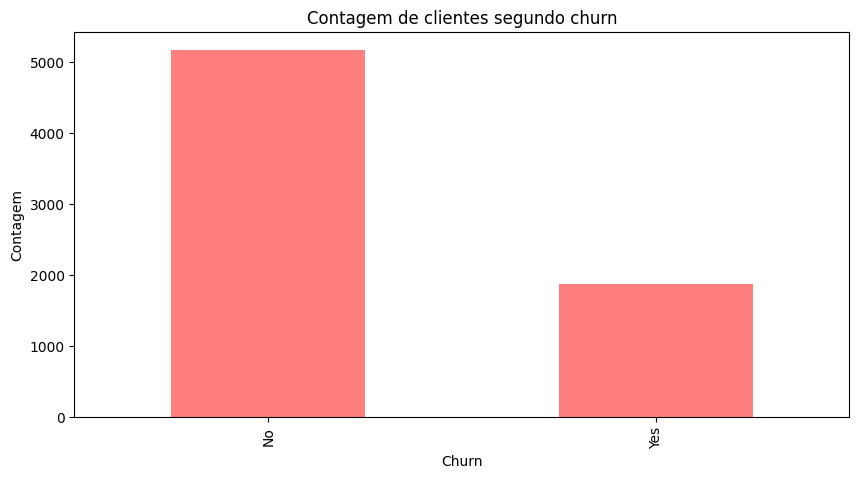

In [8]:
# Plot distribuição de churn (Quantidade de clientes)
ax = df_churn.Churn.value_counts().plot(kind='bar', color='red', alpha=0.5, figsize=(10, 5))
ax.set_title('Contagem de clientes segundo churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Contagem')
plt.show()

/tmp/ipykernel_63859/398340667.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


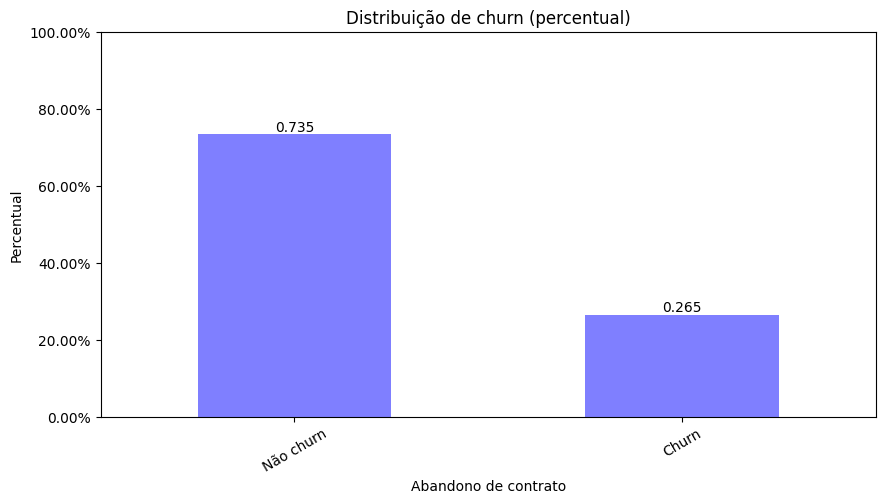

In [9]:
# Plot distribuição de churn (percentual)
ax = df_churn.Churn.value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.5, figsize=(10, 5))
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(['Não churn', 'Churn'], rotation=30)
ax.set_title('Distribuição de churn (percentual)')
ax.set_xlabel('Abandono de contrato')
ax.set_ylabel('Percentual')
ax.set_ylim(0, 1)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.show()

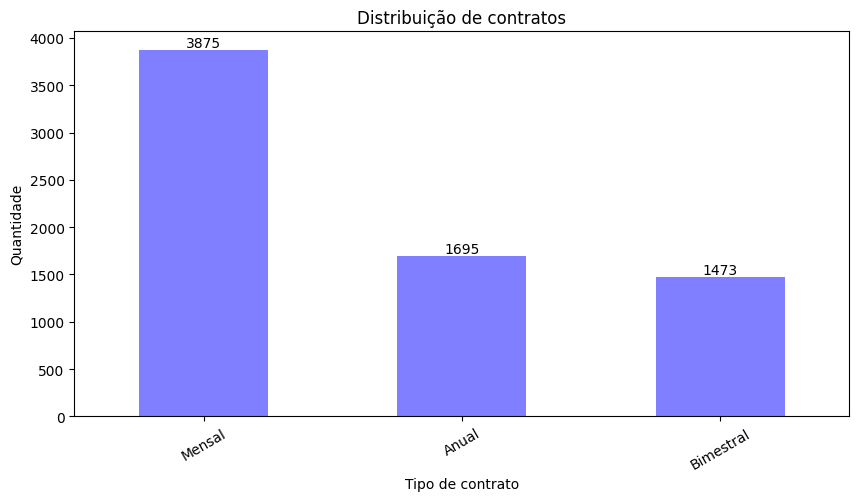

In [10]:
# Plot distribuição de contratos
ax = df_churn.Contract.value_counts().plot(kind='bar', color='blue', alpha=0.5, figsize=(10, 5))
ax.bar_label(ax.containers[0], fmt='%d')
ax.set_xticklabels(['Mensal', 'Anual', 'Bimestral'], rotation=30)
ax.set_title('Distribuição de contratos')
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('Quantidade')
plt.show()

/tmp/ipykernel_63859/762865693.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])


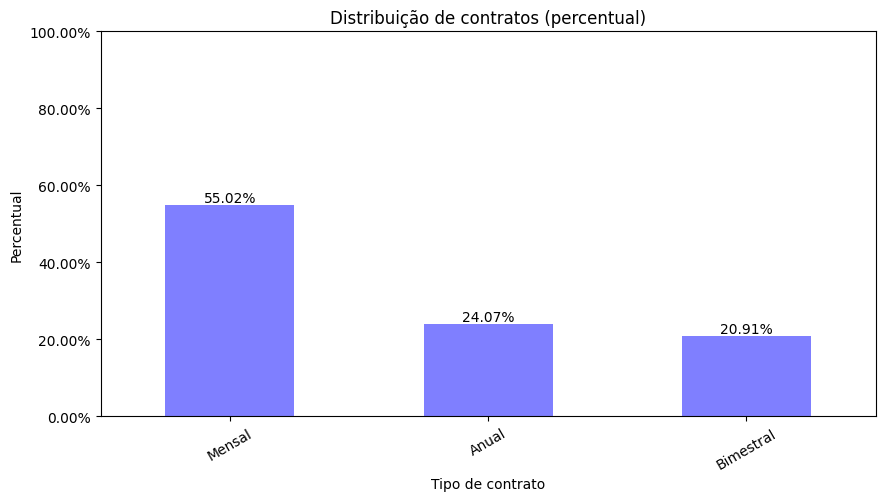

In [11]:
# Plot distribuição de contratos (percentual)
ax = df_churn.Contract.value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.5, figsize=(10, 5))
ax.bar_label(ax.containers[0], fmt='{:.2%}')
ax.set_xticklabels(['Mensal', 'Anual', 'Bimestral'], rotation=30)
ax.set_title('Distribuição de contratos (percentual)')
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('Percentual')
ax.set_ylim(0, 1)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.show()

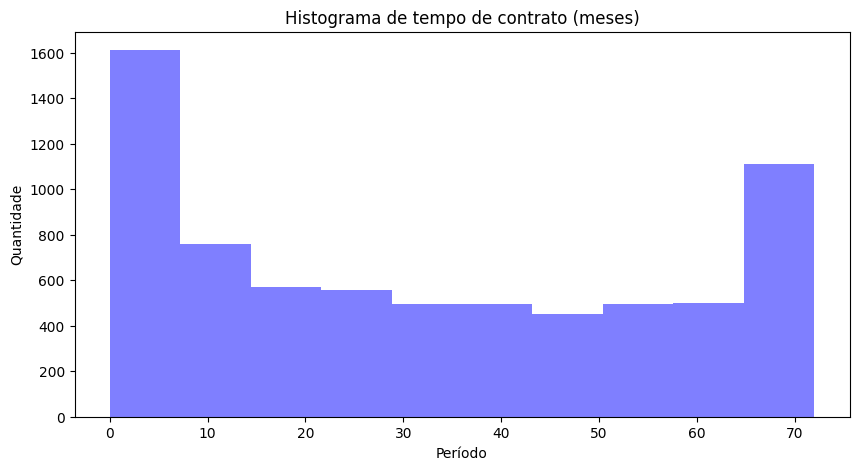

In [12]:
# Histograma de tempo de contrato
ax = df_churn.tenure.plot(kind='hist', bins=10, color='blue', alpha=0.5, figsize=(10, 5))
ax.set_title('Histograma de tempo de contrato (meses)')
ax.set_xlabel('Período')
ax.set_ylabel('Quantidade')
plt.show()

- A variável tempo de contrato (tenure) é uma variável quantitativa discreta. Ela não apresenta uma distribuição normal.
- A grande maioria dos clientes se concentram nos extremos, ou seja, os clientes que possuem um contrato de até 12 meses e os que possuem um contrato de mais de 66 meses.

<Axes: ylabel='Frequency'>

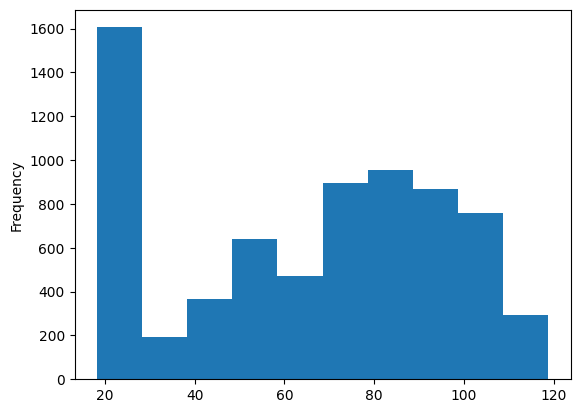

In [21]:
df_churn.MonthlyCharges.plot.hist()

## Medidas de Posição

In [13]:
# Média, Mediana e Moda

# Média
mean_tenure = df_churn.tenure.mean()
print(f'Média de tempo de contrato: {mean_tenure}')

# Mediana
median_tenure = df_churn.tenure.median()
print(f'Mediana de tempo de contrato: {median_tenure}')

# Moda
mode_tenure = df_churn.tenure.mode()
print(f'Moda de tempo de contrato: {mode_tenure}')

Média de tempo de contrato: 32.37114865824223
Mediana de tempo de contrato: 29.0
Moda de tempo de contrato: 0    1
Name: tenure, dtype: int64


In [14]:
# Medidas de Dispersão

# Desvio Padrão
std_tenure = df_churn.tenure.std()
print(f'Desvio padrão de tempo de contrato: {std_tenure}')

# Variância
var_tenure = df_churn.tenure.var()
print(f'Variância de tempo de contrato: {var_tenure}')

# Coeficiente de Variação
cv_tenure = std_tenure / mean_tenure
print(f'Coeficiente de variação de tempo de contrato: {cv_tenure}')

Desvio padrão de tempo de contrato: 24.55948102309446
Variância de tempo de contrato: 603.1681081237368
Coeficiente de variação de tempo de contrato: 0.7586842617906675


## Aplicando filtros sobre os dados

In [15]:
# Quantos clientes possuem um mês de contrato?

# Contar clientes com 1 mês de contrato
print(f"Quantidade de clientes com 1 mês de contrato: {len(df_churn[df_churn.tenure == 1])}")

Quantidade de clientes com 1 mês de contrato: 613


In [16]:
# Qual o percentual de clientes que possuem um mês de contrato?

# Contar clientes com 1 mês de contrato
print(f"Percentual de clientes com 1 mês de contrato: {len(df_churn[df_churn.tenure == 1]) / len(df_churn) * 100}%")

Percentual de clientes com 1 mês de contrato: 8.70367741019452%


In [17]:
# Quantos clientes possuem entre 1 e 6 meses de contrato?

# Contar clientes com entre 1 e 6 meses de contrato
print(f"Quantidade de clientes com entre 1 e 6 meses de contrato: {len(df_churn[(df_churn.tenure >= 1) & (df_churn.tenure <= 6)])}")

# Qual o percentual de clientes que possuem entre 1 e 6 meses de contrato?
print(f"Percentual de clientes com entre 1 e 6 meses de contrato: {len(df_churn[(df_churn.tenure >= 1) & (df_churn.tenure <= 6)]) / len(df_churn) * 100}%")

Quantidade de clientes com entre 1 e 6 meses de contrato: 1470
Percentual de clientes com entre 1 e 6 meses de contrato: 20.871787590515407%


In [18]:
# Aplicando outros filtros com base nos dados do dataframe

# Quantos clientes são do sexo masculino e possuem um contrato mensal?
print(f"Quantidade de clientes do sexo masculino e que possuem um contrato mensal: {len(df_churn[(df_churn.gender == 'Male') & (df_churn.Contract == 'Month-to-month')])}")

# Qual o percentual de clientes que são do sexo feminino e possuem um contrato de até 12 meses?
print(f"Percentual de clientes que são do sexo feminino e possuem um contrato de até 12 meses: {len(df_churn[(df_churn.gender == 'Female') & (df_churn.tenure <= 12)]) / len(df_churn) * 100}%")

Quantidade de clientes do sexo masculino e que possuem um contrato mensal: 1950
Percentual de clientes que são do sexo feminino e possuem um contrato de até 12 meses: 15.391168536135169%


In [19]:
# Apresentar a quantidade de clientes por tempo de contrato
df_churn.groupby('tenure')["tenure"].count().sort_values(ascending=False)

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

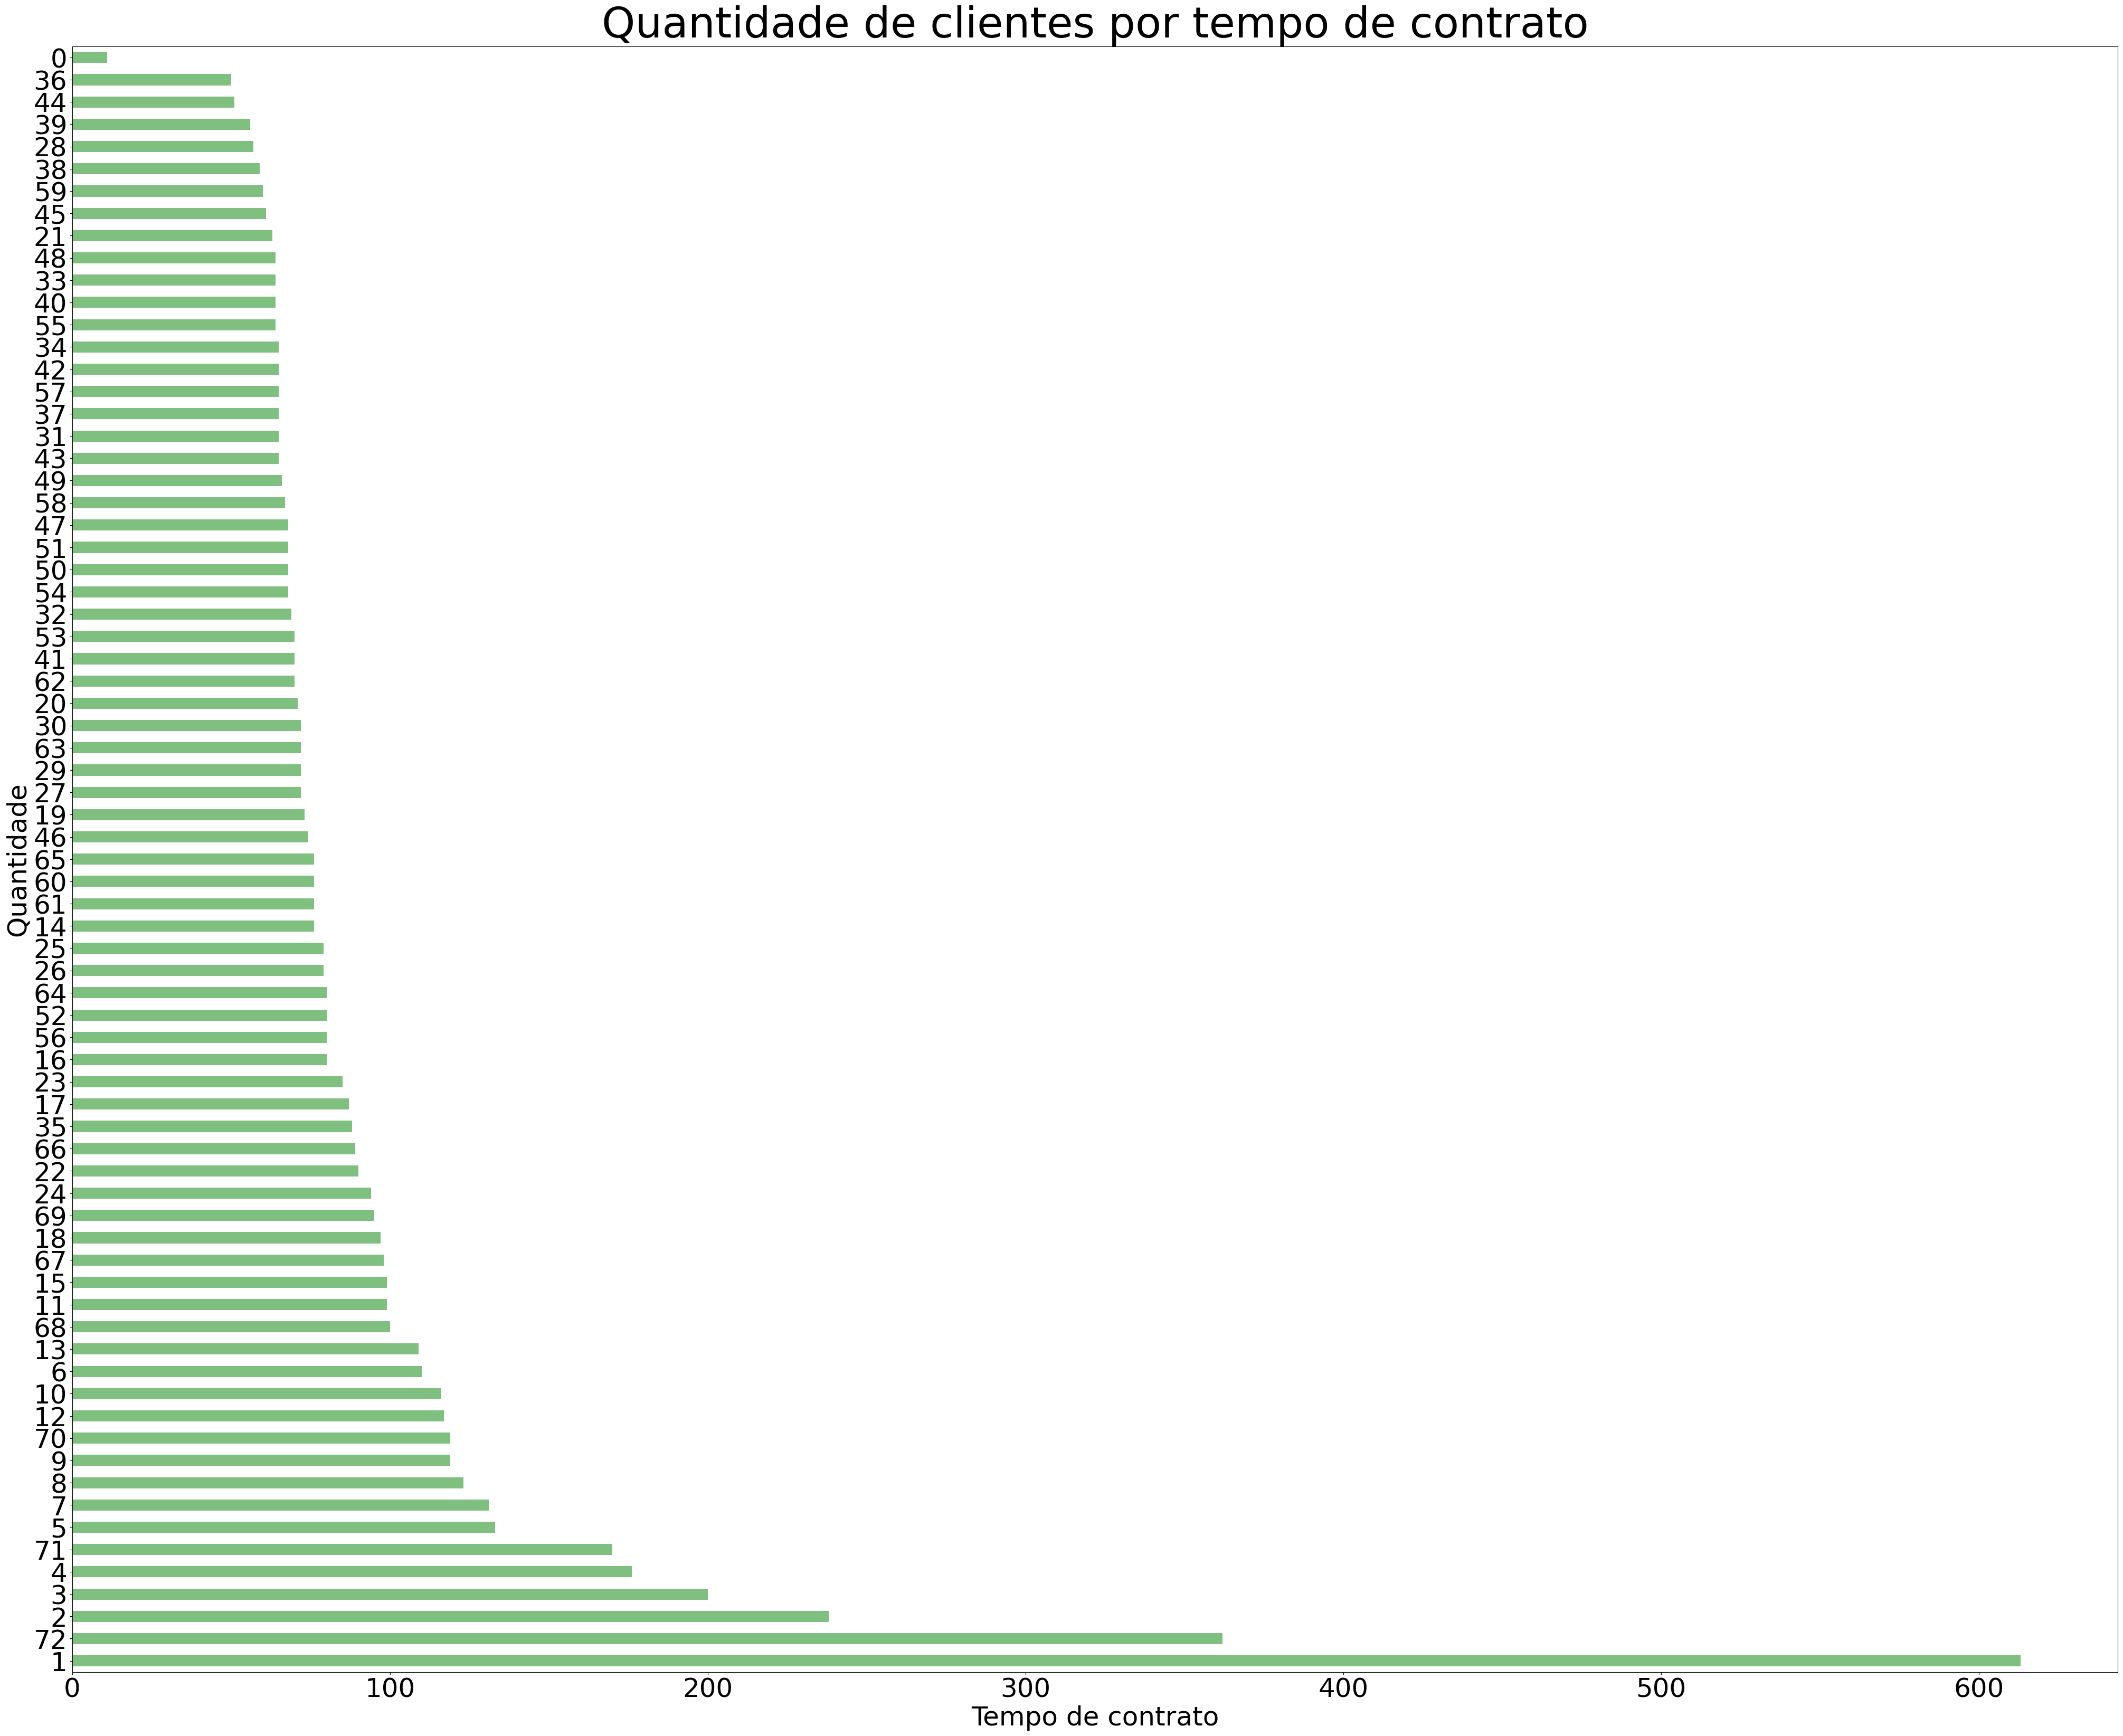

In [29]:
# Plotar a quantidade de clientes por tempo de contrato
ax = df_churn.groupby('tenure')["tenure"].count().sort_values(ascending=False).plot(kind='barh', color='green', alpha=0.5, figsize=(50, 40), fontsize=36)
ax.set_title('Quantidade de clientes por tempo de contrato', fontsize=58)
ax.set_xlabel('Tempo de contrato', fontsize=36)
ax.set_ylabel('Quantidade', fontsize=36)
plt.show()


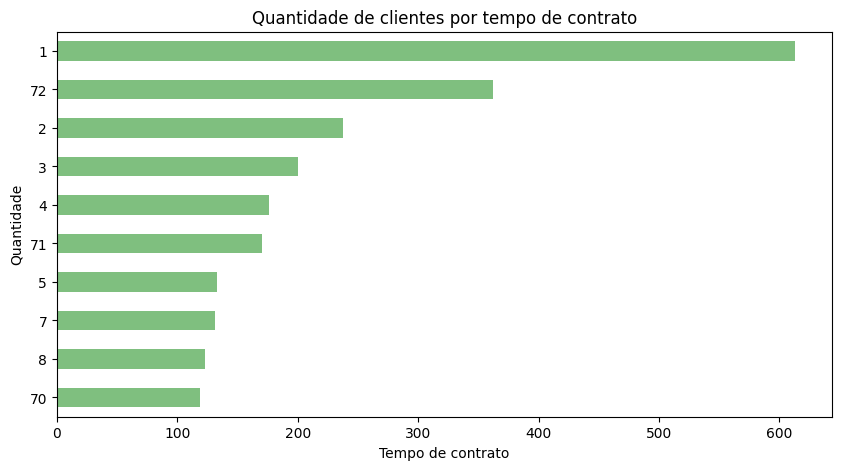

In [20]:
# Plotar a quantidade de clientes por tempo de contrato
clientes_por_tempo_de_contrato = df_churn.groupby('tenure')["tenure"].count().sort_values()
quantidade = len(clientes_por_tempo_de_contrato)
ax = clientes_por_tempo_de_contrato[quantidade-10:quantidade].plot(kind='barh', color='green', alpha=0.5, figsize=(10, 5))
ax.set_title('Quantidade de clientes por tempo de contrato')
ax.set_xlabel('Tempo de contrato')
ax.set_ylabel('Quantidade')
plt.show()